In [1]:
import pandas as pd
df= pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df.isnull().values.any()

False

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

correlation=df.corr()
top_corr_features=correlation.index

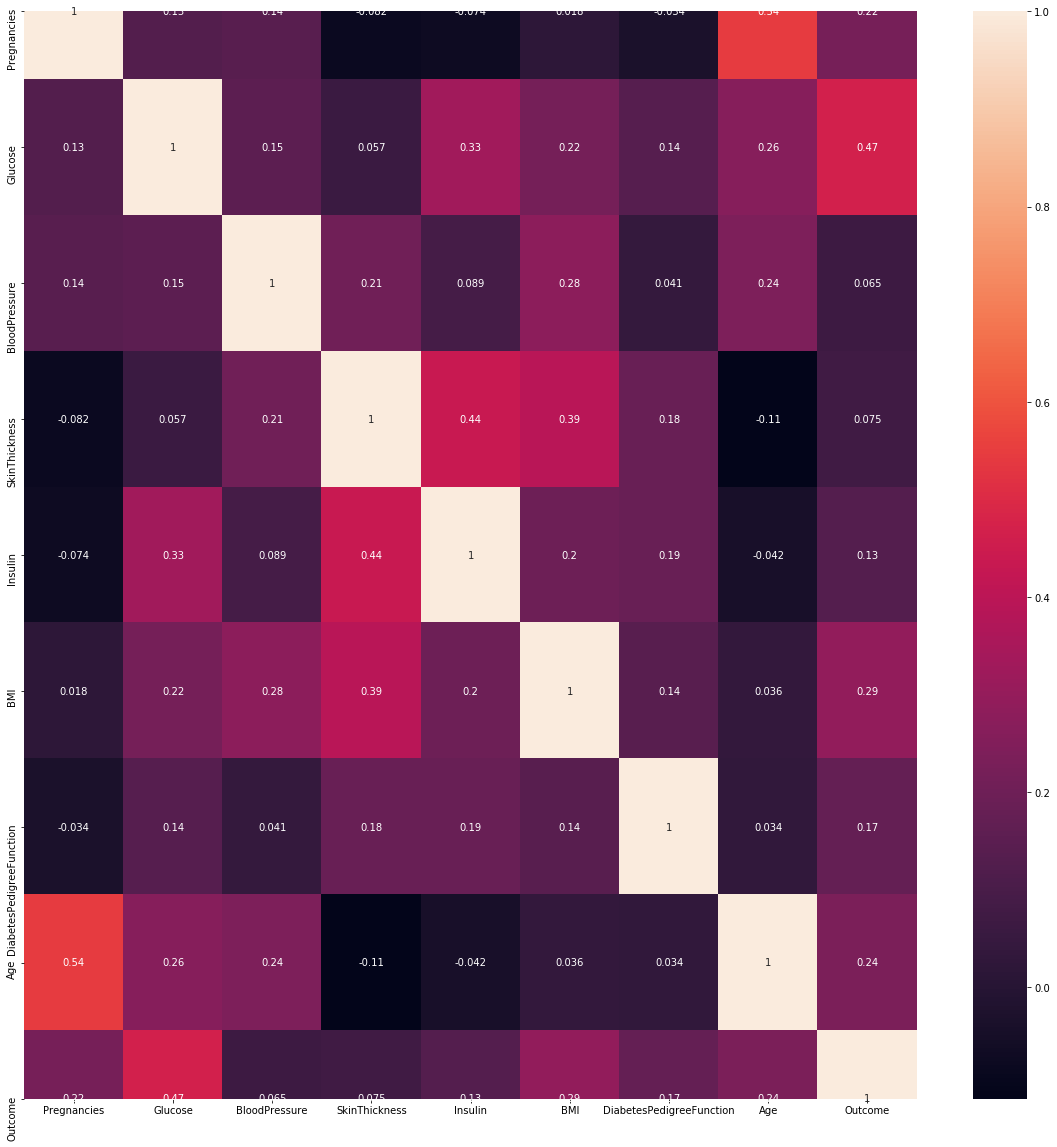

In [5]:
plt.figure(figsize=(20, 20))
sb.heatmap(df[top_corr_features].corr(), annot=True)

In [6]:
diabetes_true_count=len(df.loc[df['Outcome'] == 1])
diabetes_false_count=len(df.loc[df['Outcome'] == 0])
(diabetes_true_count, diabetes_false_count)

(268, 500)

In [7]:
df.shape

(768, 9)

In [8]:
X=df.iloc[:, :9]
y=df.iloc[:, 8]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape, X_test.shape)

(614, 9) (154, 9)


In [10]:
print(len(df))
print(len(df.loc[df['Glucose'] == 0 ]))
print(len(df.loc[df['Pregnancies'] == 0 ]))
print(len(df.loc[df['SkinThickness'] == 0 ]))
print(len(df.loc[df['BloodPressure'] == 0 ]))
print(len(df.loc[df['Insulin'] == 0 ]))
print(len(df.loc[df['DiabetesPedigreeFunction'] == 0 ]))
print(len(df.loc[df['Age'] == 0 ]))

768
5
111
227
35
374
0
0


In [11]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

fill_values=SimpleImputer(missing_values=0, strategy='mean')
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier(random_state=10)
rfm.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [13]:
predict_y=rfm.predict(X_test)
from sklearn.metrics import accuracy_score

score=accuracy_score(predict_y, y_test)

In [14]:
score

0.7467532467532467

In [15]:
params={
    'learning_rate':[0.0001, 0.001, 0.01, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5, 6, 7, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost

In [17]:
model=xgboost.XGBClassifier()

In [18]:
grid_search=GridSearchCV(model, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [19]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 497 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1521 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 2225 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3057 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 4017 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 5105 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 6321 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7665 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 10737 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 12465 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14321 tasks     

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...nt=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.15, 

In [20]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 7}

In [25]:
classifier=grid_search.best_estimator_

In [26]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_pred, y_test)
print(cm)
print(accuracy_score(y_test, y_pred))

[[85 29]
 [10 30]]
0.7467532467532467
